In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import numpy as np

In [3]:
!pip install pandas_datareader

In [4]:
import math

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [5]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 5)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999


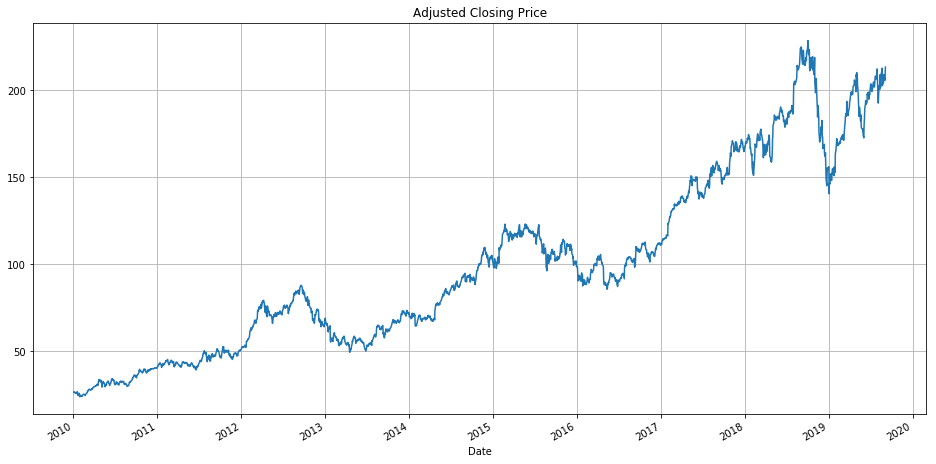

In [7]:
# Show AAPL Stock price development

df['Adj Close'].plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [8]:
# Use batches of 32 days to predict day 33

window_size = 32 # Allow us to look at 32 days into the past

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [9]:
data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [10]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


In [11]:
data[0:5]

array([[26.68132973, 26.72746468, 26.30233002, 26.25370407, 26.42824936,
        26.19511414, 25.89714622, 26.26243401, 26.11034012, 25.6739769 ,
        26.8097477 , 26.39708519, 25.94077492, 24.6541481 , 25.31741142,
        25.6752224 , 25.91709137, 24.84614563, 23.94476509, 24.27763367,
        24.41851616, 24.8386631 , 23.94351387, 24.36864853, 24.20158386,
        24.45965195, 24.32626534, 24.76883888, 24.98204231, 25.35855293,
        25.25258255, 25.29995155, 25.14286995],
       [26.72746468, 26.30233002, 26.25370407, 26.42824936, 26.19511414,
        25.89714622, 26.26243401, 26.11034012, 25.6739769 , 26.8097477 ,
        26.39708519, 25.94077492, 24.6541481 , 25.31741142, 25.6752224 ,
        25.91709137, 24.84614563, 23.94476509, 24.27763367, 24.41851616,
        24.8386631 , 23.94351387, 24.36864853, 24.20158386, 24.45965195,
        24.32626534, 24.76883888, 24.98204231, 25.35855293, 25.25258255,
        25.29995155, 25.14286995, 24.98702621],
       [26.30233002, 26.2537

In [12]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [13]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

In [14]:
# Linear regression

# Train
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_train_linear = linear_model.predict(X_train)
y_pred_linear = linear_model.predict(X_test)

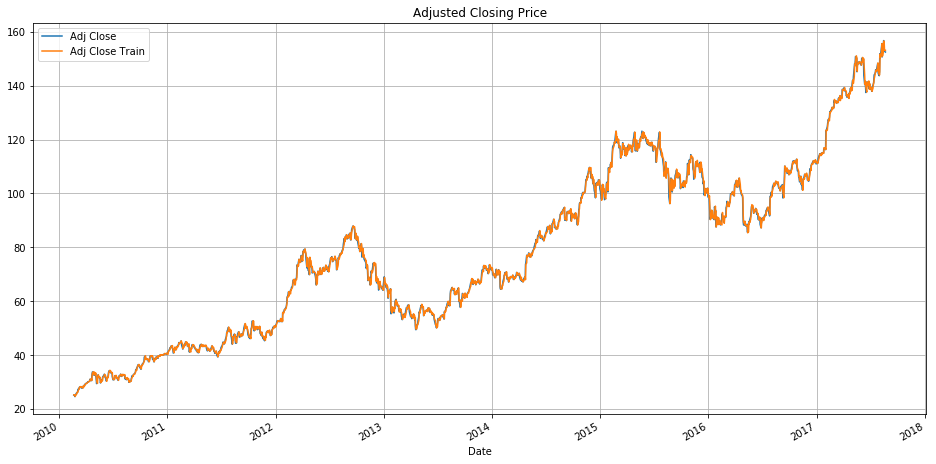

In [15]:
# Plot what it looks like for the training data
df_lin = df.copy()
df_lin.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lin = df_lin.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_lin['Adj Close Train'] = y_pred_train_linear[:-window_size]
df_lin.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

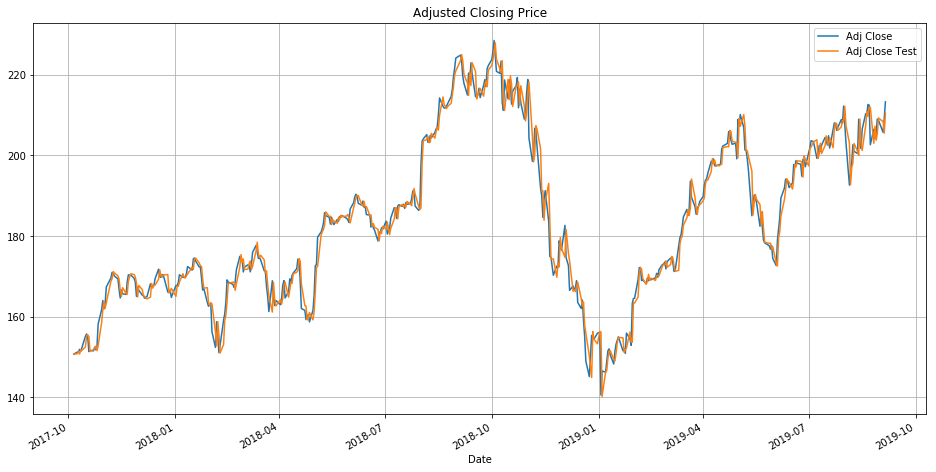

In [16]:
# Same for the test
df_lin = df.copy()
df_lin.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lin = df_lin.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_lin['Adj Close Test'] = y_pred_linear
df_lin.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [17]:
# KNN Regression

# Train
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

# Infer
y_pred_train_knn = clfknn.predict(X_train)
y_pred_knn = clfknn.predict(X_test)

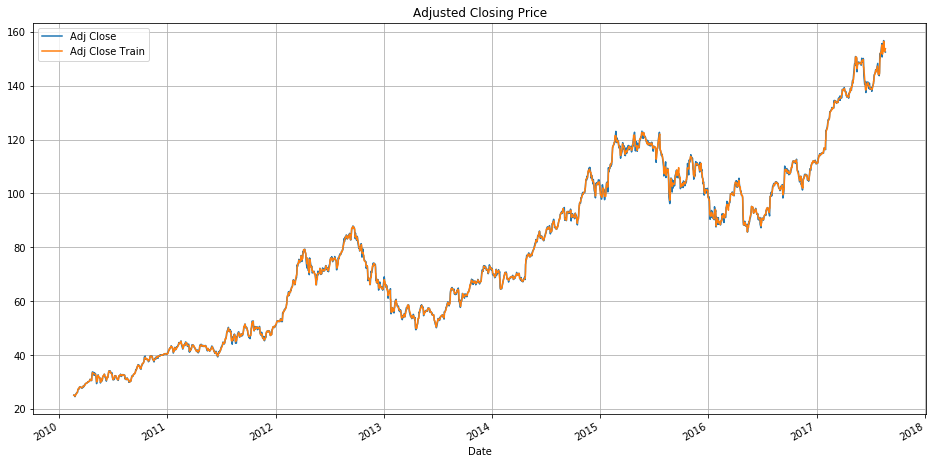

In [18]:
# Plot what it looks like for the training data
df_knn = df.copy()
df_knn.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_knn = df_knn.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_knn['Adj Close Train'] = y_pred_train_knn[:-window_size]
df_knn.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

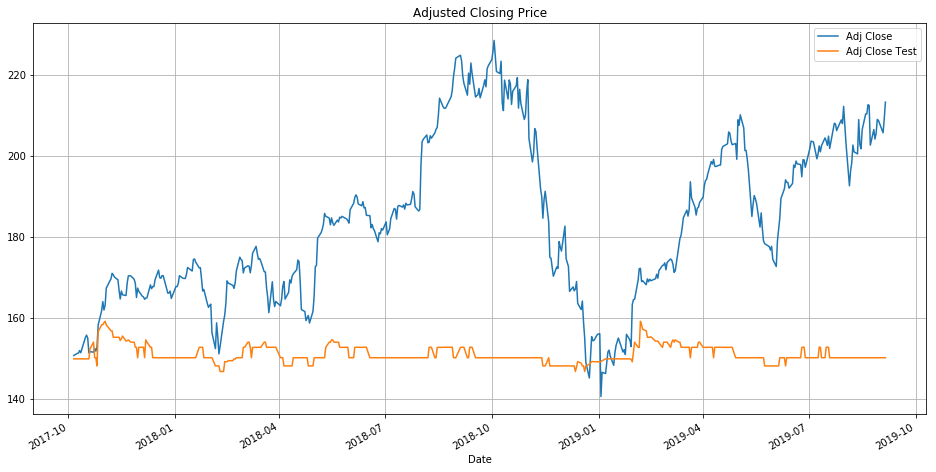

In [19]:
# Same for the test
df_knn = df.copy()
df_knn.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_knn = df_knn.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_knn['Adj Close Test'] = y_pred_knn
df_knn.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [20]:
# Quadratic regression

# Train
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Infer
y_pred_train_clfpoly2 = clfpoly2.predict(X_train)
y_pred_clfpoly2 = clfpoly2.predict(X_test)

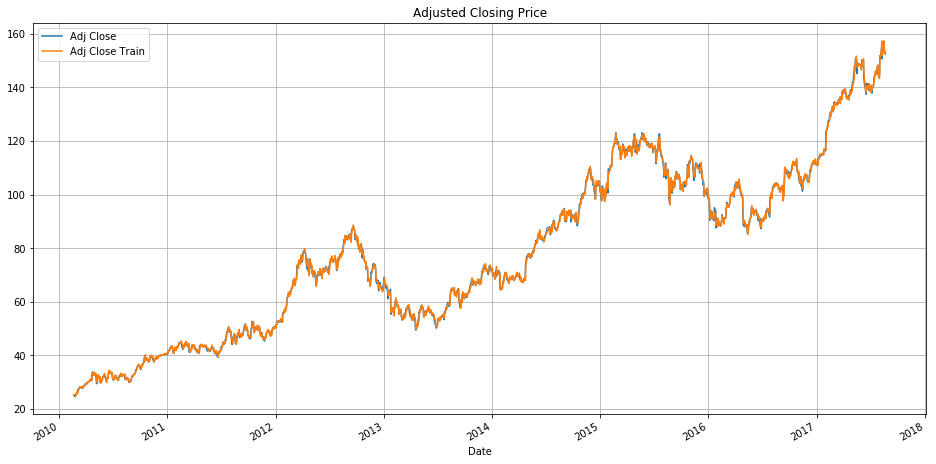

In [21]:
# Plot what it looks like for the training data
df_poly = df.copy()
df_poly.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_poly = df_poly.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_poly['Adj Close Train'] = y_pred_train_clfpoly2[:-window_size]
df_poly.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

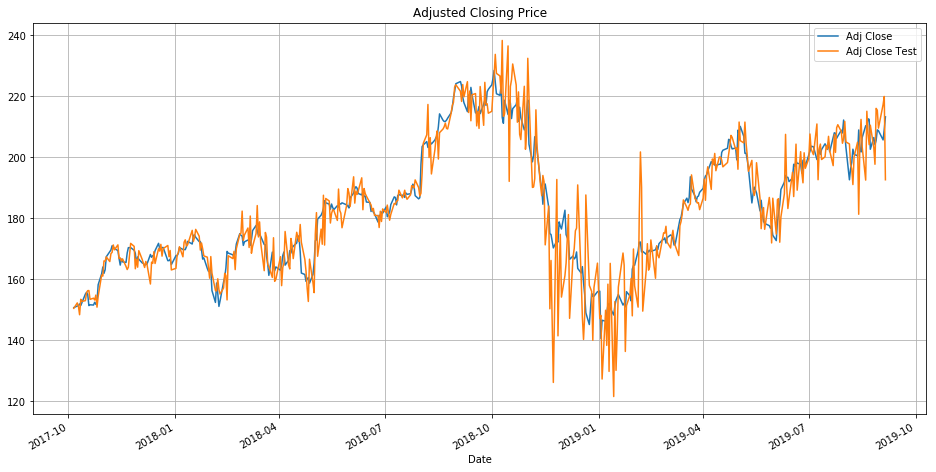

In [22]:
# Same for the test
df_poly = df.copy()
df_poly.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_poly = df_poly.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_poly['Adj Close Test'] = y_pred_clfpoly2
df_poly.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)